In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
import os

In [15]:
#locating the file directory
os.chdir("/Users/macbookretina/Desktop")
data = pd.read_csv("filename.csv")

In [16]:
print(data.head())

                    id      conversation_id               created_at  \
0  1603918303377756161  1603918293059784705  2022-12-17 01:01:37 UTC   
1  1603918301217714178  1603918301217714178  2022-12-17 01:01:37 UTC   
2  1603918300219867136  1603918300219867136  2022-12-17 01:01:36 UTC   
3  1603918297191550976  1603918297191550976  2022-12-17 01:01:36 UTC   
4  1603918297053134848  1603918297053134848  2022-12-17 01:01:36 UTC   

         date      time  timezone              user_id         username  \
0  2022-12-17  01:01:37         0           2357605077      techleaks24   
1  2022-12-17  01:01:37         0  1302899451292520448      tgt22018623   
2  2022-12-17  01:01:36         0  1226071139346198528  carolyn28728628   
3  2022-12-17  01:01:36         0  1234589108535746560        elnasir15   
4  2022-12-17  01:01:36         0  1318807997829754880  gloryri57949578   

               name place  ... geo source user_rt_id user_rt retweet_id  \
0                TL   NaN  ... NaN    NaN

In [17]:
#taking a look at all the column on the data set
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [18]:
#we need only 3 column for this task
data = data[["username", "tweet", "language"]]

In [19]:
#checking if the data has any null value
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [20]:
#check how many tweets posted in which language
data["language"].value_counts()

en     8789
pt      294
it      247
qme     126
in       99
und      74
es       64
ca       49
ru       38
fi       24
fr       24
ja       22
th       20
de       20
zh       13
qht      12
et       11
nl       11
ro        8
pl        7
ar        7
cs        7
vi        5
uk        5
qam       5
tl        4
cy        3
sv        3
tr        3
hi        2
ht        2
zxx       2
da        2
no        2
hu        1
eu        1
ko        1
Name: language, dtype: int64

In [22]:
#removing links, punctuation, symbols and other lang errors
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text =" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text =" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookretina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


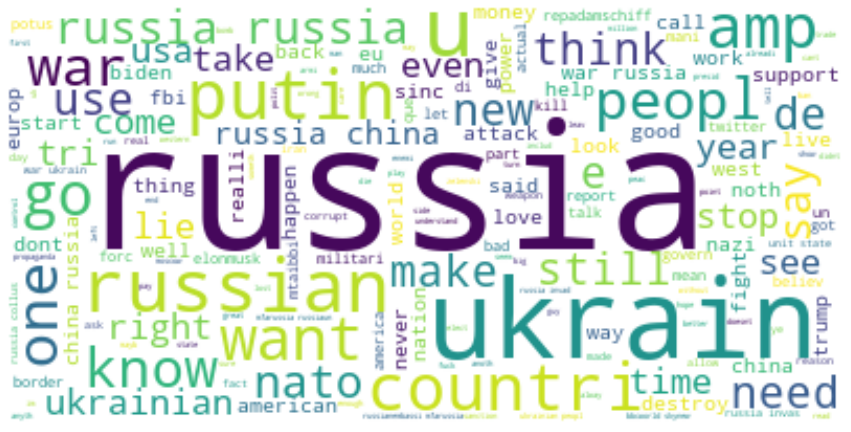

In [23]:
#showing the most used words in tweet by people
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
#adding 3 more columns of +ve, _ve and neu by calc the sentiment scores of the tweets
nltk.download('vader_lexicon')
sentiments  = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbookretina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0   thing chang ukrain war led weaponis natur res...     0.241     0.177   
1         come  weekend    喝茶 足控 骚穴 同城约 骚逼 辱骂 萝莉 lo娘     0.000     0.000   
2                          come  weekend    福田 罗湖 盐田     0.000     0.000   
3                          come  weekend    怀柔 平谷 上海     0.000     0.000   
4         come  weekend  httpstcoxrtzlxtct  杨浦 闸北 普陀     0.000     0.000   

   Neutral  
0    0.582  
1    1.000  
2    1.000  
3    1.000  
4    1.000  


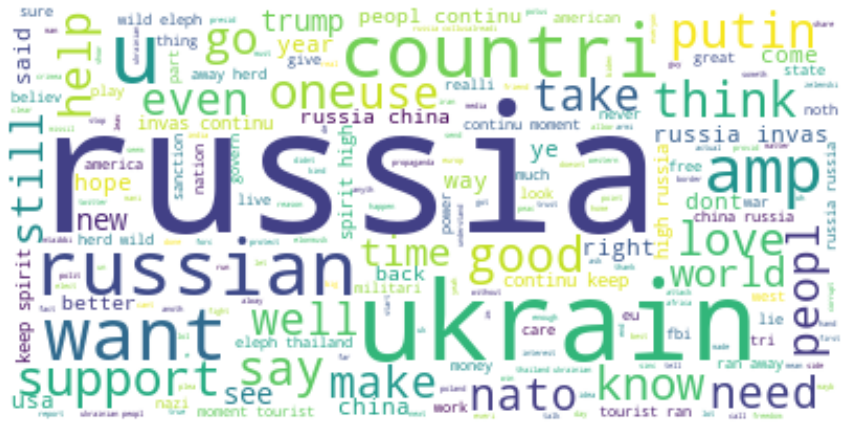

In [27]:
#checking the most frequent words used by people with +ve sentiments
positive =''.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

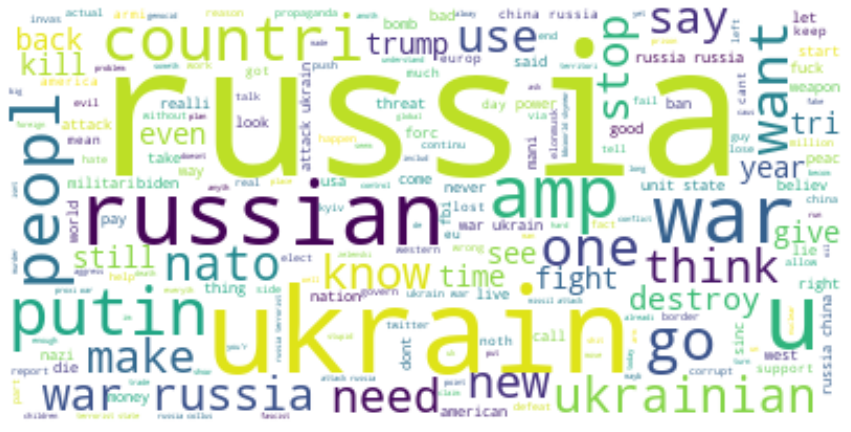

In [29]:
#checking the most frequent words used by people with +ve sentiments
negative =''.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()